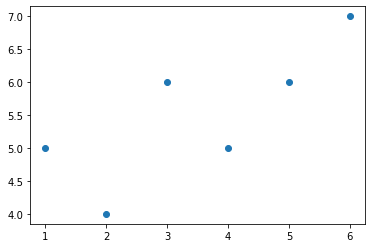

In [6]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt


xs = np.array([1, 2, 3, 4, 5, 6], dtype=np.float64)
ys = np.array([5, 4, 6, 5, 6, 7], dtype=np.float64)

plt.scatter(xs,ys)
plt.show()



In [7]:
def best_fit_slope(xs, ys):
    numerator = np.mean(xs) * np.mean(ys) - np.mean(xs * ys)
    denominator = np.mean(xs)**2 - np.mean(xs**2)
    return numerator / denominator

In [8]:
m = best_fit_slope(xs, ys)

print(m)

0.42857142857142866


In [9]:
def best_fit_intercept(xs, ys, m):
    return np.mean(ys) - m * np.mean(xs)

In [10]:
b = best_fit_intercept(xs, ys, m)

print(b)

4.0


In [11]:
regression_line = [(m * x) + b for x in xs]

from matplotlib import style
style.use('fivethirtyeight')


In [12]:
predict_x = 8
predict_y = (m * predict_x) + b

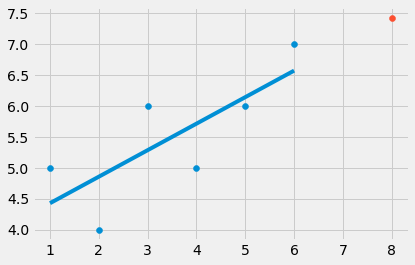

In [13]:
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y)
plt.plot(xs, regression_line)
plt.show()

In [ ]:
# Calculate how good our fit line is with squared error

In [14]:
def squared_error(ys_original, ys_line):
    return sum((ys_line - ys_original)**2)

def coefficient_of_determination(ys_original, ys_line):
    ys_mean_line = [np.mean(ys_original) for y in ys_original]
    squared_err_regr = squared_error(ys_original, ys_line)
    squared_err_y_mean = squared_error(ys_original, ys_mean_line)
    return 1 - (squared_err_regr) / (squared_err_y_mean)

In [15]:
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.5844155844155845


In [16]:
print([np.mean(ys) for y in ys])

[5.5, 5.5, 5.5, 5.5, 5.5, 5.5]


In [24]:
# testing

import random
import numpy as np

# size tells how many points to generate
###
# variance determines how scattered our data becomes
# it could make our dataset non-linear if set too low
### 
# step is how much to add to our value
# corelation is either positive or negative 
def create_dataset(size, variance, step = 2, correlation = False):
    val = 1
    ys = []
    for i in range(size):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation == 'pos':
            val += step
        elif correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    
    # return xs and ys
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

In [25]:
xs, ys = create_dataset(40, 40, 2, correlation='pos')

In [26]:
m = best_fit_slope(xs, ys)

b = best_fit_intercept(xs, ys, m)

regression_line = [(m * x) + b for x in xs]

predict_x = 8
predict_y = (m * predict_x) + b

r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.5138835781622133


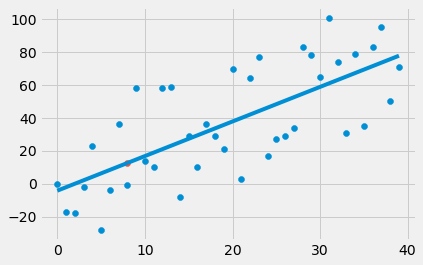

In [27]:
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y)
plt.plot(xs, regression_line)
plt.show()